### Load packages

In [1]:
%matplotlib inline

import datacube
from datacube.storage import masking
from datacube.helpers import write_geotiff
import matplotlib.pyplot as plt
import numpy as np
import sys
import xarray as xr

sys.path.append("../Scripts")
from dea_plotting import display_map
from dea_datahandling import wofs_fuser

### Connect to the datacube

In [2]:
dc = datacube.Datacube(app="Applying_WOfS_bitmasking")

### Analysis parameters

In [71]:
# Define your period of interest
year = 2015
time = (str(year))

res_x = 25
res_y = -25

In [72]:
location = 'KI'
min_x = 360600
max_x = 551200
min_y = -3945800
max_y = -3716500

location = 'Kakadu'
min_x = 0
max_x = 100000
min_y = -1350000
max_y = -1250000

location = 'Murray Valley'
min_x = 1100000
max_x = 1200000
min_y = -4000000
max_y = -3900000

### View the selected location

In [73]:
# Make sure to change the location for in the save file
location = 'Murray Valley'
min_x = 1100000
max_x = 1200000
min_y = -4000000
max_y = -3900000

x = (min_x, max_x)
y = (min_y, max_y)

# Display an interactive map
display_map(x=x, y=y, crs='EPSG:3577', margin=-0.1) 

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


## Load WOFL data


To load WOFL data, we can first create a re-usable query that will define the spatial extent and time period we are interested in, as well as other important parameters that are used to correctly load the data.

As WOFLs are created scene-by-scene, and some scenes overlap, it's important when loading data to `group_by` solar day, and ensure that the data between scenes is combined correctly by using the WOfS `fuse_func`.
This will merge observations taken on the same day, and ensure that important data isn't lost when overlapping datasets are combined.

In [74]:
# Create a reusable query
query = {
    "x": x,
    "y": y,
    "time": time,
    "crs": "EPSG:3577",
    "output_crs": "EPSG:3577",
    "resolution": (-25, 25),
    "group_by": "solar_day",
    "fuse_func": wofs_fuser,
}

In [75]:
# Load the data from the datacube
fc = dc.load(product="fc_percentile_albers_annual", **query)
fc

<xarray.Dataset>
Dimensions:    (time: 1, x: 4000, y: 4000)
Coordinates:
  * time       (time) datetime64[ns] 2015-01-01
  * y          (y) float64 -3.9e+06 -3.9e+06 -3.9e+06 ... -4e+06 -4e+06 -4e+06
  * x          (x) float64 1.1e+06 1.1e+06 1.1e+06 ... 1.2e+06 1.2e+06 1.2e+06
Data variables:
    BS_PC_10   (time, y, x) int16 11 11 10 11 11 12 10 ... 10 10 12 14 16 21 20
    PV_PC_10   (time, y, x) int16 7 7 7 7 9 9 9 7 7 ... 20 21 22 27 34 20 19 19
    NPV_PC_10  (time, y, x) int16 15 13 13 15 18 16 15 9 ... 0 0 0 0 14 13 9 8
    BS_PC_50   (time, y, x) int16 14 16 14 15 16 16 16 ... 18 19 18 18 25 30 31
    PV_PC_50   (time, y, x) int16 34 35 33 30 34 37 38 ... 52 53 54 52 37 34 35
    NPV_PC_50  (time, y, x) int16 40 38 38 39 38 34 36 ... 37 36 39 27 30 29 30
    BS_PC_90   (time, y, x) int16 53 54 55 55 54 56 57 ... 23 25 25 27 36 39 42
    PV_PC_90   (time, y, x) int16 69 70 70 70 68 69 73 ... 78 79 78 58 63 67 70
    NPV_PC_90  (time, y, x) int16 59 58 60 59 55 56 53 ... 57 55 51 44 43 46 46
Attributes:
    crs:      EPSG:3577

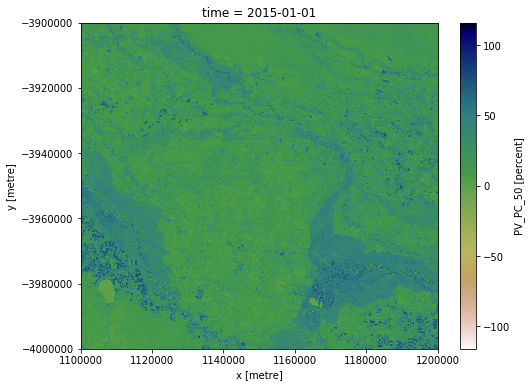

In [76]:
# Visualise an example tile
fc1 = fc.isel(time=0)
fc1.PV_PC_50.plot.imshow(cmap="gist_earth_r", figsize=(8, 6))
plt.show()

### Export out tif

In [77]:
# Export PV to GeoTIFF
fc_PV_PC_50 = fc.PV_PC_50.isel(time=0).to_dataset(name='PV_PC_50')
write_geotiff(f'{location}_{year}_PV_PC_50.tif', fc_PV_PC_50)

# Export NPV to GeoTIFF
fc_NPV_PC_50 = fc.NPV_PC_50.isel(time=0).to_dataset(name='NPV_PC_50')
write_geotiff(f'{location}_{year}_NPV_PC_50.tif', fc_NPV_PC_50)